<center><h1>Obradoiro: Como aprenden as máquinas a partir de datos</h1></center>

<center><img src="https://camelia.usc.gal/rs/logo-camelia-top.svg" width="600px"></center>
<br>
<center>Brais Castiñeiras ✉️ <a href= "mailto:brais.castineirasgaldo@plexus.es">brais.castineirasgaldo@plexus.es</a></center>
<center>Nicolás Vila ✉️ <a href= "mailto:nicolas.vila@usc.es">nicolas.vila@usc.es</a></center>

## Aprendizaxe automática e medicina

A **aprendizaxe automática** (*machine learning*) é unha rama da intelixencia artificial que permite desenvolver sistemas capaces de aprender a partir de datos e mellorar o seu rendemento sen seren programados explicitamente. No contexto médico, isto significa que os algoritmos poden analizar grandes volumes de información —como imaxes médicas, rexistros electrónicos de saúde ou datos xenéticos— para identificar patróns, facer predicións ou asistir no diagnóstico e no tratamento.

Na práctica, a aprendizaxe automática está a cambiar a medicina en moitos ámbitos. Por exemplo, xa se usa para detectar enfermidades en fases temperás mediante a análise de imaxes de raios X, resonancias magnéticas ou fotografías dermatolóxicas. Tamén se emprega para predicir riscos de complicacións, personalizar tratamentos segundo o perfil de cada paciente, ou mesmo para optimizar a xestión hospitalaria. A súa capacidade para procesar datos complexos e atopar relacións permite aos profesionais da saúde aforrar tempo e mellorar os resultados.

Existen dous grandes enfoques principais dentro da aprendizaxe automática: a **aprendizaxe supervisada** e a **aprendizaxe non supervisada**.

- Na **aprendizaxe supervisada**, o modelo é adestrado con datos de entrada aos que se lles asocia unha resposta coñecida (como o diagnóstico dunha enfermidade ou a evolución dun parámetro clínico). É o caso típico de predición ou clasificación, e inclúe modelos como regresións, árbores de decisión ou redes neuronais. Exemplos comúns na medicina inclúen a predición da probabilidade de reingreso hospitalario ou a clasificación de imaxes como benignas ou malignas. No exemplo inferior, vemos como un modelo se adestra para predicir se un paciente está enfermo a partir da súa masa muscular e as horas semanais de exercicio.

<center>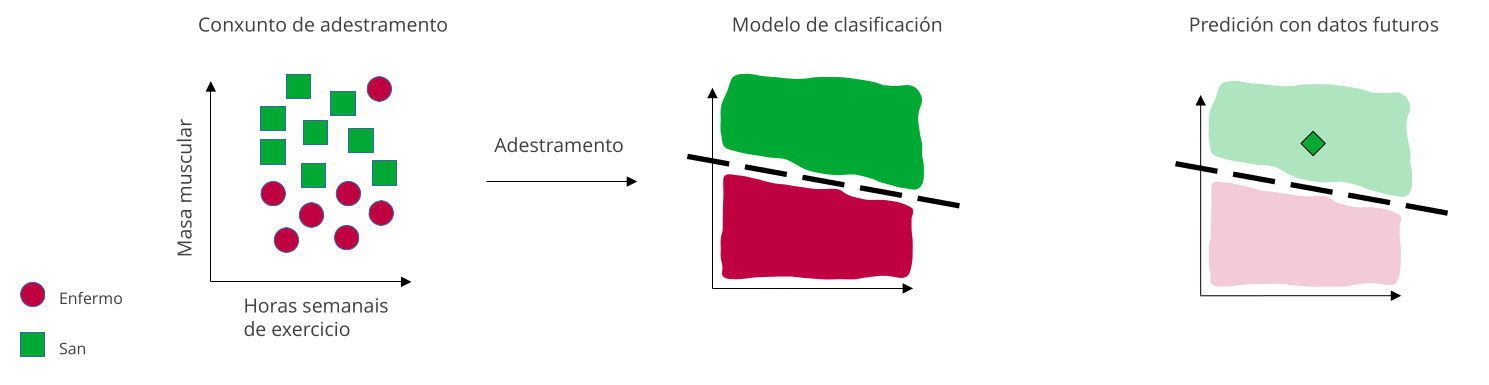</center>

- Na **aprendizaxe non supervisada**, o sistema trata de descubrir estruturas ou patróns ocultos en datos sen etiquetas previas. Este enfoque é útil, por exemplo, para segmentar pacientes en grupos con características clínicas similares ou para detectar anomalías nos sinais vitais que poidan indicar un problema de saúde non diagnosticado. Os métodos máis típicos son, entre outros, o agrupamento (*clustering*) e a redución de dimensións (como PCA). No exemplo inferior, vemos como un modelo é capaz de agrupar pacientes en 3 grupos de acordo ás súas similaridades de masa muscular e horas semanais de exercicio, o cal pode ser útil para facer recomendacións personalizadas de exercicio físico ou distintos tratamentos ante certas patoloxías.

<center>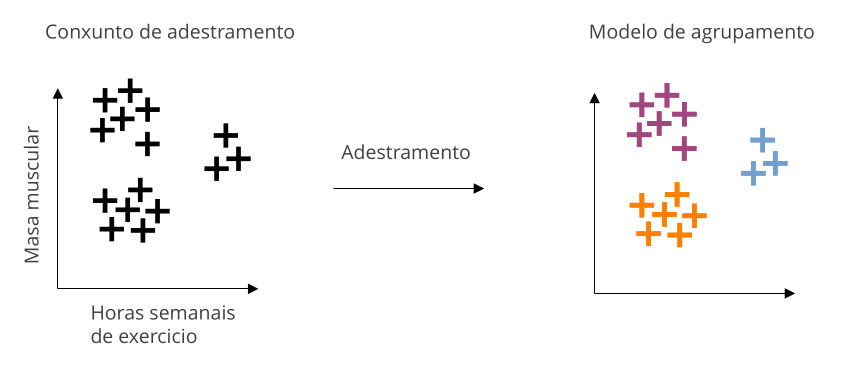</center>

## Modelos de regresión

Os **modelos de regresión** son un tipo de algoritmo de aprendizaxe automática supervisada que se utiliza para predicir valores numéricos continuos a partir de datos de entrada. A súa principal finalidade é establecer unha relación entre unha ou varias variables independentes (por exemplo, idade, presión arterial, nivel de glicosa) e unha variable dependente (como pode ser a duración dunha estancia hospitalaria ou o nivel de risco dun paciente).

Na medicina, os modelos de regresión son amplamente utilizados para tarefas como:
- **Predición da duración da hospitalización** segundo factores clínicos e demográficos.
- **Estimación da probabilidade de supervivencia** en pacientes con enfermidades crónicas ou agudas.
- **Cálculo da dose óptima dun medicamento**, en función das características individuais do paciente.
- **Modelado do progreso dunha enfermidade**, como a evolución dos niveis de HbA1c en persoas con diabetes.

## Regresión lineal

A **regresión lineal** é un dos modelos estatísticos máis sinxelos e utilizados dentro da aprendizaxe automática supervisada. Permite modelar a relación entre unha ou máis variables independentes (ou características) e unha variable dependente (ou resposta), asumindo que esta relación é lineal.

A fórmula da regresión lineal simple (cunha soa variable preditora) é:

$$
y = \beta_0 + \beta_1 x
$$

Onde:
- $y$ é a variable que se quere predicir (dependente)
- $x$ é a variable preditora (independente)
- $\beta_0$ é o termo independente ou constante (intercepto)
- $\beta_1$ é o coeficiente que representa o efecto de $x$ sobre $y$

Por exemplo, un posible modelo para predicir o tempo de recuperación dunha lesión (en días) a partir da idade do paciente (en anos), a fórmula podería ser:

$$
\text{Tempo\_recuperación} = \beta_0 + \beta_1 \cdot \text{Idade}
$$

Se no caso anterior $\beta_0=10$ e $\beta_1=0.1$, o tempo de recuperación estimado sería de $10$ días, máis $0.1$ días adicionais por cada ano do paciente. Para un paciente de 30 anos, o tempo estimado de recuperación sería de $10 + 0.1 \cdot 30 = 13$ días.

Para ver un caso práctico, imos primeiro a simular un conxunto de datos que represente a idade dos pacientes e o tempo de recuperación dunha lesión.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
ages = np.random.randint(18, 80, 50)
recovery_times = 11 + 0.08 * ages + np.random.normal(0, 0.5, 50)

plt.scatter(ages, recovery_times, color='blue', label='Datos reais')
plt.xlabel('Idade do paciente (anos)')
plt.ylabel('Tempo de recuperación (días)')
plt.title('Idade vs Tempo de recuperación')
plt.legend()
plt.grid()
plt.show()

Ahora imos ver que tal se comporta un modelo de regresión cos parámetros mencionados anteriormente ($\beta_0=10$ e $\beta_1=0.1$) e como se comporta ante os datos simulados.

In [ ]:
X = ages.reshape(-1, 1) 
y = recovery_times

beta_0 = 10
beta_1 = 0.1

xlim = (15, 85)
ylim = (10, 20)

plt.figure(figsize=(10, 6))
plt.scatter(ages, recovery_times, alpha=0.6, color='blue', label='Datos de adestramento')

plt.plot(ages, beta_0 + beta_1 * ages, color='red', linewidth=2, label=rf'$\beta_0 = {beta_0}, \beta_1 = {beta_1}$')

new_patient_age = 30
predicted_recovery_time = beta_0 + beta_1 * new_patient_age

plt.plot((new_patient_age, new_patient_age), (ylim[0], predicted_recovery_time), color='green', linestyle='--', label=f'Novo paciente (Idade = {new_patient_age})\nTempo estimado de recuperación = {predicted_recovery_time:.2f} días')
plt.scatter(new_patient_age, predicted_recovery_time, color='green', s=100, edgecolor='black', zorder=5)
plt.plot((xlim[0], new_patient_age), (predicted_recovery_time, predicted_recovery_time), color='green', linestyle='--')

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('Idade (anos)')
plt.ylabel('Tempo de recuperación (días)')
plt.title('Predición do tempo de recuperación segundo a idade do paciente (bo axuste)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Como vemos, este modelo é capaz de capturar a tendencia dos datos (aumento do tempo de recuperación co aumento da idade), pero evidentemente non é perfecto, xa que hai variacións e erros aleatorios que non se poden explicar só pola idade.

Ahora imos ver que pasaría se cambiamos os parámetros do modelo, por exemplo, aumentando $\beta_1$ a $0.08$. Isto significa que o modelo asume que o tempo de recuperación aumenta máis lentamente co aumento da idade.

In [ ]:
beta_0 = 14
beta_1 = 0.05

xlim = (15, 85)
ylim = (10, 20)

plt.figure(figsize=(10, 6))
plt.scatter(ages, recovery_times, alpha=0.6, color='blue', label='Datos de adestramento')

plt.plot(ages, beta_0 + beta_1 * ages, color='red', linewidth=2, label=rf'$\beta_0 = {beta_0}, \beta_1 = {beta_1}$')

new_patient_age = 30
predicted_recovery_time = beta_0 + beta_1 * new_patient_age

plt.plot((new_patient_age, new_patient_age), (ylim[0], predicted_recovery_time), color='green', linestyle='--', label=f'Novo paciente (Idade = {new_patient_age})\nTempo estimado de recuperación = {predicted_recovery_time:.2f} días')
plt.scatter(new_patient_age, predicted_recovery_time, color='green', s=100, edgecolor='black', zorder=5)
plt.plot((xlim[0], new_patient_age), (predicted_recovery_time, predicted_recovery_time), color='green', linestyle='--')

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('Idade (anos)')
plt.ylabel('Tempo de recuperación (días)')
plt.title('Predición do tempo de recuperación segundo a idade do paciente (mal axuste)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Como vemos, este modelo compórtase moito peor que o anterior, xa que os erros de predición son maiores. Concretamente, a predición sobreestima sistemáticamente o tempo de recuperación.

### Como facemos o axuste automáticamente?

Para calcular os parámetros óptimos do modelo de regresión lineal, podemos utilizar a biblioteca `scikit-learn`, que é unha das máis populares en Python para tarefas de aprendizaxe automática. Esta biblioteca proporciona unha implementación eficiente do algoritmo de regresión lineal, que axusta os parámetros do modelo minimizando o erro cuadrático medio entre as predicións e os valores reais.

In [ ]:
from sklearn.linear_model import LinearRegression

# Poñemos os datos en formato adecuado para o modelo
# X debe ser unha matriz na que cada fila correspóndese a un exemplo de adestramento (neste caso, un paciente) e cada columna a unha característica dese exemplo (neste caso, a idade)
# Y debe ser un vector cos valores de saída para cada exemplo (tempos de recuperación)
X = ages.reshape(-1, 1) 
Y = recovery_times

# Creamos o modelo de regresión lineal
model = LinearRegression()
# Axustámolo aos datos de adestramento
model.fit(X, Y)
# Obtemos os parámetros do modelo axustado
beta_0 = model.intercept_
beta_1 = model.coef_[0]

xlim = (15, 85)
ylim = (10, 20)

plt.figure(figsize=(10, 6))
# Amosamos os datos de adestramento e a liña de regresión axustada
plt.scatter(ages, recovery_times, alpha=0.6, color='blue', label='Datos de adestramento')
plt.plot(ages, beta_0 + beta_1 * ages, color='red', linewidth=2, label=rf'$\beta_0 = {beta_0:.2f}, \beta_1 = {beta_1:.2f}$')

# Ahora imos predecir o tempo de recuperación para un novo paciente cunha idade de 30 anos
# Para utilizar a función de predición do modelo, necesitamos que a idade do paciente tamén estea en formato de matriz
# A idade do novo paciente debe ser un array bidimensional, aínda que só teña un valor
# Por iso, usamos np.array([[30]]) para crear un array de 2D con un só elemento
new_patient_age = 30
X_new = np.array([[new_patient_age]])
# Facemos a predición do tempo de recuperación para o novo paciente
# A función predict do modelo devolve un array cas predicións, así que obtemos o primeiro elemento para obter o valor escalar
predicted_recovery_time = model.predict(X_new)[0] # Esto sería o mesmo que calcular (beta_0 + beta_1 * new_patient_age)

plt.plot((new_patient_age, new_patient_age), (ylim[0], predicted_recovery_time), color='green', linestyle='--', label=f'Novo paciente (Idade = {new_patient_age})\nTempo estimado de recuperación = {predicted_recovery_time:.2f} días')
plt.scatter(new_patient_age, predicted_recovery_time, color='green', s=100, edgecolor='black', zorder=5)
plt.plot((xlim[0], new_patient_age), (predicted_recovery_time, predicted_recovery_time), color='green', linestyle='--')

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('Idade (anos)')
plt.ylabel('Tempo de recuperación (días)')
plt.title('Predición do tempo de recuperación segundo a idade do paciente (axuste automático)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Como sabemos se o modelo se vai comportar ben con datos futuros?

Cando desenvolvemos un modelo de aprendizaxe automática, o noso obxectivo último é que se comporte ben en datos futuros. A fin de contas, no conxunto de adestramento xa coñecemos o valor da variable a predicir. Para facer un axuste o máis robusto posible, hai que reservar parte dos datos de adestramento para a validación final, de tal maneira que estes non tomen parte no adestramento (axuste) do modelo. Deste xeito simularemos unhas condicións o máis realistas posibles.

Unha vez axustado o modelo de xeito automático, podemos realizar as predicións para cada dato de validación directamente coa función `predict()`.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos os datos en conxuntos de adestramento e validación
# Utilizamos un 80% dos datos para o adestramento e un 20% para a validación final, e fixamos a semente aleatoria para reproducibilidade
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creamos e axustamos o modelo de regresión lineal cos datos de adestramento
model = LinearRegression()
model.fit(X_train, Y_train)
beta_0 = model.intercept_
beta_1 = model.coef_[0]

xlim = (15, 85)
ylim = (10, 20)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=0.6, color='blue', label='Datos de adestramento')
plt.scatter(X_test, Y_test, alpha=0.6, color='orange', label='Datos de validación')
plt.plot(X_train, beta_0 + beta_1 * X_train, color='red', linewidth=2, label=rf'$\beta_0 = {beta_0:.2f}, \beta_1 = {beta_1:.2f}$')

# Agora imos predecir o tempo de recuperación para cada paciente no conxunto de validación
predicted_recovery_times = model.predict(X_test)
# Para cada paciente no conxunto de validación, obtemos a idade (x), o tempo real de recuperación (y) e o tempo de recuperación predicido (predicted_recovery_time)
for x,y,predicted_recovery_time in zip(X_test, Y_test, predicted_recovery_times):
    # Representamos a predición e unha liña vertical que indica o erro cometido
    plt.plot((x, x), (y, predicted_recovery_time), color='green', linestyle='--')
    plt.scatter(x, predicted_recovery_time, color='green', s=50, edgecolor='black', zorder=5)

plt.legend()
plt.show()


Como os valores do tempo de recuperación destes datos son coñecidos (recordade que os *separamos* do conxunto de adestramento), podémolos utilizar para calcular o erro cometido na predición e así simular que pasaría con novos datos futuros.

Para elo existen distintas métricas de erro. Supoñendo que temos un modelo que predí $Y$ a partir de $X$, e que temos $n$ observacións, onde $Y_i$ son os valores reais e $\hat{Y}_i$ son as predicións do modelo para cada observación $i$:

- Erro absoluto medio (MAE, *mean absolute error*): é a media das diferenzas absolutas entre os valores reais e as predicións do modelo. Indica a cantidade media de erro en unidades da variable dependente.
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|
$$
- Erro cadrático medio (MSE, *mean squared error*): é a media dos cadrados das diferenzas entre os valores reais e as predicións do modelo. Penaliza máis os erros grandes que o MAE.
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$
- Raíz do erro cadrático medio (RMSE, *root mean squared error*): é a raíz cadrada do MSE. Permite interpretar o erro en unidades da variable dependente, o que facilita a súa interpretación.
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}$$

In [ ]:
predicted_recovery_times = model.predict(X_test) # Internamente isto fai beta_0 + beta_1 * X_test
error = Y_test - predicted_recovery_times

mae = np.mean(np.abs(error))
mse = np.mean(error ** 2)
rmse = np.sqrt(mse)

print(f"Erro absoluto medio (MAE): {mae:.2f} días")
print(f"Erro cadrático medio (MSE): {mse:.2f}")
print(f"Raíz do erro cadrático medio (RMSE): {rmse:.2f} días")

Comparando os valores destas métricas entre distintos modelos, podemos determinar cal é o que mellor se adapta aos datos e, polo tanto, o que probablemente se comportará mellor con datos futuros. Vamos facer as predicións cos modelos anteriores e calcular as métricas de erro.

- Modelo 1: $\beta_0=10$ e $\beta_1=0.1$
- Modelo 2: $\beta_0=14$ e $\beta_1=0.05$
- Modelo 3 : $\beta_0=11.71$ e $\beta_1=0.07$ (valores axustados automaticamente)

In [ ]:
# Creamos os valores beta_0 e beta_1 para os modelos 1, 2 e 3
beta_0_model_1 = 10.0
beta_1_model_1 = 0.1

beta_0_model_2 = 14.0
beta_1_model_2 = 0.05

beta_0_model_3 = model.intercept_
beta_1_model_3 = model.coef_[0]

# Agora imos calcular as métricas de erro para cada modelo
predictions_model_1 = beta_0_model_1 + beta_1_model_1 * X_test
predictions_model_2 = beta_0_model_2 + beta_1_model_2 * X_test
predictions_model_3 = beta_0_model_3 + beta_1_model_3 * X_test

# Calculamos os erros para cada modelo
errors_model_1 = Y_test - predictions_model_1
errors_model_2 = Y_test - predictions_model_2
errors_model_3 = Y_test - predictions_model_3

# Calculamos as métricas de erro para cada modelo
mae_model_1 = np.mean(np.abs(errors_model_1))
mae_model_2 = np.mean(np.abs(errors_model_2))
mae_model_3 = np.mean(np.abs(errors_model_3))
mse_model_1 = np.mean(errors_model_1 ** 2)
mse_model_2 = np.mean(errors_model_2 ** 2)
mse_model_3 = np.mean(errors_model_3 ** 2)
rmse_model_1 = np.sqrt(mse_model_1)
rmse_model_2 = np.sqrt(mse_model_2)
rmse_model_3 = np.sqrt(mse_model_3)

print(f"Modelo 1 - MAE: {mae_model_1:.2f}, MSE: {mse_model_1:.2f}, RMSE: {rmse_model_1:.2f}")
print(f"Modelo 2 - MAE: {mae_model_2:.2f}, MSE: {mse_model_2:.2f}, RMSE: {rmse_model_2:.2f}")
print(f"Modelo 3 - MAE: {mae_model_3:.2f}, MSE: {mse_model_3:.2f}, RMSE: {rmse_model_3:.2f}")

### Que pasa cando temos máis dunha variable independente?

O funcionamento básico da regresión lineal non cambia cando temos máis dunha variable independente. A fórmula xeral para a regresión lineal múltiple é:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$
Onde:
- $y$ é a variable dependente que queremos predicir.
- $x_1, x_2, ..., x_n$ son as variables independentes
- $\beta_0$ é o termo independente ou constante (intercepto).
- $\beta_1, \beta_2, ..., \beta_n$ son os coeficientes que representan o efecto de cada variable independente sobre a variable dependente.

Por exemplo, se queremos predicir o tempo de recuperación dunha lesión a partir da idade do paciente e das horas de exercicio físico que realiza ao día, a fórmula podería ser:
$$\text{Tempo\_recuperación} = \beta_0 + \beta_1 \cdot \text{Idade} + \beta_2 \cdot \text{Horas\_exercicio}$$

O axuste dos modelos, o cálculo das predicións e a avaliación do erro realízanse de xeito semellante ao caso da regresión lineal simple. A principal diferenza é que agora temos máis coeficientes ($\beta_1, \beta_2, ..., \beta_n$) que estimar, o que pode facer que o modelo sexa máis complexo e requira máis datos para un axuste adecuado.

O aspecto onde máis se nota a diferenza é na visualización dos resultados. Se temos unha variable independente, podemos representar os datos nunha gráfica bidimensional, onde o modelo de regresión é unha liña recta. Se temos dúas variables independentes, podemos representar os datos nunha gráfica tridimensional, onde o modelo de regresión é un plano. Se temos máis de dúas variables independentes, a visualización xa non é tan sinxela, pero o modelo segue sendo unha extensión da regresión lineal simple.

No exemplo que vemos a continuación, imos axustar o modelo con dúas variables independentes mencionadas anteriormente: a idade do paciente e as horas de exercicio físico que realiza ao día. O modelo predicirá o tempo de recuperación da lesión en días.

En primeiro lugar, creamos un conxunto de datos simulado.

In [ ]:
ages = np.random.randint(18, 80, 50)
exercise_hours_per_day = np.random.randint(1, 5, 50)
recovery_times = 11 + 0.08 * ages + (-0.1) * exercise_hours_per_day + np.random.normal(0, 0.5, 50)

Ahora creamos e axustamos o modelo de regresión lineal múltiple.

In [ ]:
# Combinamos as dúas variables independentes na matriz X
X = np.column_stack((ages, exercise_hours_per_day))
Y = recovery_times 
model = LinearRegression()
model.fit(X, Y)
# Obtemos os parámetros de modelo axustado (ahora temos un máis)
beta_0 = model.intercept_
beta_1 = model.coef_[0]
beta_2 = model.coef_[1]

# O que vén a continuación é a creación dunha superficie 3D que representa o modelo de regresión lineal múltiple, non é preciso entender todo o código

age_range = np.linspace(15, 85, 20)
exercise_range = np.linspace(1, 5, 20)
age_grid, exercise_grid = np.meshgrid(age_range, exercise_range)
recovery_grid = beta_0 + beta_1 * age_grid + beta_2 * exercise_grid

import plotly.graph_objects as go

scatter = go.Scatter3d(
    x=ages, 
    y=exercise_hours_per_day, 
    z=recovery_times,
    mode='markers',
    marker=dict(size=6, color='blue', opacity=0.7),
    name='Datos de adestramento'
)

surface = go.Surface(
    x=age_grid,
    y=exercise_grid,
    z=recovery_grid,
    colorscale='Reds',
    opacity=0.3,
    name='Plano de regresión',
    showscale=False
)

fig = go.Figure(data=[scatter, surface])

fig.update_layout(
    title=f'Predición do tempo de recuperación<br>β₀ = {beta_0:.2f}, β₁ = {beta_1:.2f}, β₂ = {beta_2:.2f}',
    scene=dict(
        xaxis_title='Idade (anos)',
        yaxis_title='Horas de exercicio por día',
        zaxis_title='Tempo de recuperación (días)'
    ),
    width=800,
    height=600
)

# Show the interactive plot
fig.show()

### Exemplo práctico

No próximo exemplo, traballaremos cun conxunto de datos público no que se recolle a información proporcionada por unha aseguradora sobre os seus clientes. O conxunto de datos inclúe variables como a idade, o sexo, o índice de masa corporal (IMC), o número de fillos, a zona xeográfica e o custo do seguro médico anual. O obxectivo é desenvolver un modelo de regresión lineal múltiple que prediga o custo do seguro médico anual en función das outras variables.

O primeiro que imos facer é cargar o conxunto de datos e explorar as súas características. A continuación, axustaremos un modelo de regresión lineal múltiple e avaliaremos o seu rendemento utilizando as métricas de erro mencionadas anteriormente.

In [ ]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
dataset.head()

As variables deste dataset son:
- `age`: Idade do cliente (en anos)
- `sex`: Sexo do cliente (masculino ou feminino)
- `bmi`: Índice de masa corporal (IMC)
- `children`: Número de fillos do cliente
- `region`: Zona xeográfica do cliente (noroeste, suroeste, nordeste, suroeste)
- `smoker`: Estado de fumador do cliente (si ou non)
- `charges`: Custo do seguro médico anual (en dólares). Esta é a variable que imos predicir.

O primeiro problema que nos atopamos é que o conxunto de datos ten variables categóricas (como o sexo, a zona xeográfica ou o estado de fumador) que non podemos usar directamente no modelo de regresión lineal. Para iso, imos utilizar a técnica de codificación *one-hot encoding* (tamén coñecido como as variables *dummy*), que converte as variables categóricas en variables binarias (0 ou 1) que representan a presenza ou ausencia de cada categoría.

In [ ]:
dataset = pd.get_dummies(dataset, columns=['sex', 'region', 'smoker'], drop_first=True)
dataset.head()

Se nos fixamos na táboa anterior, vemos que para cada variable categórica, se crean tantas columnas como categorías menos unha. Por exemplo, para a variable `sex`, creamos unha columna `sex_male` que toma o valor 1 se o cliente é masculino. Se a columna vale 0, o cliente é da categoría restante, é dicir, `sex_female`. Para a variable `region`, creamos catro columnas: `region_northwest`, `region_southeast` e `region_southwest`. Se as tres columnas valen 0, o cliente é da rexión restante, é dicir, `region_northeast`.

Ahora imos axustar o modelo de regresión lineal seguindo os pasos que vimos anteriormente:

1. Separamos as variables independentes (predictoras) e a variable dependente (a que queremos predicir)
2. Dividimos os datos en conxunto de adestramento e conxunto de validación (test)
3. Creamos o modelo de regresión lineal e axustámolo cos datos de adestramento
4. Facemos as predicións para o conxunto de validación
5. Calculamos as métricas de erro (MAE, MSE, RMSE)

In [ ]:
# O conxunto de variables independentes (X) inclúe todas as columnas excepto 'charges', que é a variable dependente (y)
X = dataset.drop('charges', axis=1)
y = dataset['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

predicted_charges = model.predict(X_test)
# Outra maneira de calcular as métricas de erro é utilizando as funcións específicas de scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, predicted_charges)
mse = mean_squared_error(Y_test, predicted_charges)
rmse = np.sqrt(mse)
print(f"Erro absoluto medio (MAE): {mae:.2f} dólares")
print(f"Erro cadrático medio (MSE): {mse:.2f}")
print(f"Raíz do erro cadrático medio (RMSE): {rmse:.2f} dólares")

Imos comparar o rendemento do modelo de regresión lineal múltiple con outros modelos de aprendizaxe automática, como os árbores de decisión e os bosques aleatorios.

In [ ]:
from sklearn.tree import DecisionTreeRegressor


decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, Y_train)
predicted_charges_tree = decision_tree_model.predict(X_test)
mae_tree = mean_absolute_error(Y_test, predicted_charges_tree)
mse_tree = mean_squared_error(Y_test, predicted_charges_tree)
rmse_tree = np.sqrt(mse_tree)
print(f"Árbore de decisións - MAE: {mae_tree:.2f} dólares")
print(f"Árbore de decisións - MSE: {mse_tree:.2f}")
print(f"Árbore de decisións - RMSE: {rmse_tree:.2f} dólares")

from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, Y_train)
predicted_charges_forest = random_forest_model.predict(X_test)
mae_forest = mean_absolute_error(Y_test, predicted_charges_forest)
mse_forest = mean_squared_error(Y_test, predicted_charges_forest)
rmse_forest = np.sqrt(mse_forest)
print(f"Bosque aleatorio - MAE: {mae_forest:.2f} dólares")
print(f"Bosque aleatorio - MSE: {mse_forest:.2f}")
print(f"Bosque aleatorio - RMSE: {rmse_forest:.2f} dólares")

Se representamos as métricas de erro dos distintos modelos, podemos ver que o modelo de bosque aleatorio ten o mellor rendemento en todos os casos. É curioso que o modelo de regresión lineal ten un erro absoluto medio (MAE) maior que a árbore de decisión pero un erro cadrático medio (MSE) e unha raíz do erro cadrático medio (RMSE) menor. Isto indica que a árbore de decisión ten un rendemento mellor en media, pero os erros máis grandes teñen unha maior magnitude.

In [ ]:
error_metrics = {
    'Modelo de regresión lineal': [mae, mse, rmse],
    'Árbore de decisión': [mae_tree, mse_tree, rmse_tree],
    'Bosque aleatorio': [mae_forest, mse_forest, rmse_forest]
}
metrics_names = ['MAE', 'MSE', 'RMSE']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(error_metrics.keys(), [error_metrics[model][0] for model in error_metrics.keys()])
axes[0].set_title('MAE (Dólares)')
axes[0].set_ylabel('Erro absoluto medio')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(error_metrics.keys(), [error_metrics[model][1] for model in error_metrics.keys()])
axes[1].set_title('MSE')
axes[1].set_ylabel('Erro cadrático medio')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

axes[2].bar(error_metrics.keys(), [error_metrics[model][2] for model in error_metrics.keys()])
axes[2].set_title('RMSE (Dólares)')
axes[2].set_ylabel('Raíz do erro cadrático medio')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Modelos de clasificación

Os **modelos de clasificación** son un tipo de algoritmo de aprendizaxe automática supervisada que se utiliza para asignar unha etiqueta ou categoría a unha observación baseada en un conxunto de características. A diferenza dos modelos de regresión, que predín valores numéricos continuos, os modelos de clasificación predín categorías (valores discretos).

Na medicina, os modelos de clasificación son amplamente utilizados para tarefas como:
- **Diagnóstico de enfermidades**: Clasificar a presenza ou ausencia dunha enfermidade a partir de síntomas, resultados de probas ou imaxes médicas.
- **Detección de tipos de cancro**: Identificar o tipo específico de cancro a partir de biopsias ou imaxes médicas.
- **Triaxe de pacientes**: Clasificar a gravidade dos síntomas para priorizar o tratamento.

### Regresión loxística

A **regresión loxística** é un modelo de clasificación que se utiliza para predecir a probabilidade de que unha observación pertenza a unha categoría específica. A diferenza da regresión lineal, a regresión loxística non predí valores numéricos continuos, senón probabilidades que van de 0 a 1.

A fórmula da regresión loxística é:
$$P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}$$
Onde:
- $P(y=1|x)$ é a probabilidade de que a observación pertenza á categoría 1 (por exemplo, que un paciente teña unha enfermidade).
- $x_1, x_2, ..., x_n$ son as variables independentes (características).
- $\beta_0$ é o termo independente ou constante (intercepto).
- $\beta_1, \beta_2, ..., \beta_n$ son os coeficientes que representan o efecto de cada variable independente sobre a probabilidade.

En esencia, a regresión loxística é unha regresión lineal onde á saída se lle aplica unha función especial (chamada sigmoide) para garantir que os valores preditos estean entre 0 e 1.

Un posible modelo de regresión loxística para predecir a probabilidade de que un paciente teña diabetes a partir da súa idade e do seu índice de masa corporal (IMC) podería ser:
$$P(\text{Diabetes}=1|\text{Idade}, \text{IMC}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot \text{Idade} + \beta_2 \cdot \text{IMC})}}$$

Se no caso anterior $\beta_0=-5$, $\beta_1=0.05$ e $\beta_2=0.1$, a probabilidade de que un paciente de 50 anos con IMC de 30 teña diabetes sería:
$$P(\text{Diabetes}=1|50, 30) = \frac{1}{1 + e^{-(-5 + 0.05 \cdot 50 + 0.1 \cdot 30)}} = \frac{1}{1 + e^{-0.5}} \approx 0.62$$
Isto significa que hai un 62% de probabilidade de que o paciente teña diabetes.

A maneira de axustar automaticamente os parámetros dun modelo de regresión loxística é semellante á da regresión lineal, utilizando a biblioteca `scikit-learn`. Neste caso utilizamos a clase `LogisticRegression` para crear o modelo. Imos velo con un conxunto de datos simulado.

In [ ]:
# Simulamos os datos de adestramento: idade e imc como variables indpendentes (numéricas) e diabetes como variable dependente (binaria)
n = 1000
age = np.random.uniform(low=18, high=90, size=n)
imc = np.random.uniform(low=18, high=27, size=n)
logit = -10 + 0.08 * age + 0.18 * imc 
prob_diabetes = 1 / (1 + np.exp(-logit))
diabetes = np.random.binomial(1, prob_diabetes)

Ahora formateamos o conxunto de datos para que sexa compatible co modelo de regresión loxística, separamos os conxuntos de adestramento e validación, e axustamos o modelo.

In [ ]:
X = np.column_stack((age, imc))
y = diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

Do mesmo xeito que coa regresión lineal, podemos obter as predicións do modelo no conxunto de validación.

In [ ]:
predicted_diabetes = logistic_model.predict(X_test)

O que cambia é a maneira de avaliar o rendemento do modelo. Neste caso, como estamos a tratar cun problema de clasificación, utilizamos métricas específicas para este tipo de tarefas. A maneira máis rápida e intuitiva de avaliar un modelo de clasificación é a través da **matriz de confusión**, que nos permite ver como se comporta o modelo en cada categoría. A matriz de confusión é unha táboa que compara as predicións do modelo coas etiquetas reais, mostrando os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
A matriz de confusión ten a seguinte forma:
| Predicións / Reais | Positivo (1) | Negativo (0) |
|---------------------|--------------|--------------|
| **Positivo (1)**    | Verdadeiros positivos (TP) | Falsos negativos (FN) |
| **Negativo (0)**    | Falsos positivos (FP) | Verdadeiros negativos (TN) |
- **Verdadeiros positivos (TP)**: Predicións correctas de que a observación pertence á categoría positiva.
- **Falsos negativos (FN)**: Predicións incorrectas de que a observación non pertence á categoría positiva, cando en realidade si pertence.
- **Falsos positivos (FP)**: Predicións incorrectas de que a observación pertence á categoría positiva, cando en realidade non pertence.
- **Verdadeiros negativos (TN)**: Predicións correctas de que a observación non pertence á categoría positiva.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_diabetes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(2), ['Non diabetes', 'Diabetes'])
plt.yticks(np.arange(2), ['Non diabetes', 'Diabetes'])
plt.xlabel('Predición')
plt.ylabel('Realidade')
plt.title('Matriz de confusión')
# Engadimos os valores da matriz de confusión no mapa de calor
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

A simple vista, podemos sacar varias conclusións:
- O modelo é capaz de identificar razonablemente ben aos pacientes sen diabetes (131 identificacións correctas e 15 incorrectas)
- O modelo confúndese á hora de identificar aos pacientes con diabetes (28 identificacións correctas e 26 incorrectas)

A partir desta matriz, podemos calcular distintas métricas de rendemento do modelo de clasificación:
- **Exactitude (*Accuracy*)**: A proporción de predicións correctas sobre o total de predicións feitas. Indica que tan ben o modelo clasifica as observacións.
$$\text{Exactitude} = \frac{\text{Número de predicións correctas}}{\text{Total de predicións}}$$
- **Exhaustividade (*Recall*)**: A proporción de casos positivos correctamente identificados polo modelo sobre o total de casos positivos reais. Indica que tan ben o modelo detecta os casos positivos.
$$\text{Exhaustividade} = \frac{\text{Verdadeiros positivos}}{\text{Verdadeiros positivos} + \text{Falsos negativos}}$$
- **Precisión (*Precision*)**: A proporción de casos positivos correctamente identificados polo modelo sobre o total de casos que o modelo clasificou como positivos. Indica que tan ben o modelo evita clasificar falsamente casos negativos como positivos.
$$\text{Precisión} = \frac{\text{Verdadeiros positivos}}{\text{Verdadeiros positivos} + \text{Falsos positivos}}$$
- **F1-Score**: A media harmónica entre a precisión e a exhaustividade. É unha métrica que equilibra ambas as dúas, especialmente útil cando hai un desbalance entre as clases.

Imos calcular estas métricas para o modelo de regresión loxística que axustamos anteriormente. Pero en vez de facer os cálculos manualmente, imos utilizar a función `classification_report` de `scikit-learn`, que nos proporciona un informe detallado das métricas de rendemento.

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted_diabetes, target_names=['Non diabetes', 'Diabetes'])
print(report)

Destas métricas podemos confirmar o que xa vimos na matriz de confusión, que o modelo falla ao detectar aos pacientes con diabetes. Neste caso particular, sería preferible detectar máis falsos positivos (pacientes que o modelo identifica como diabéticos pero que non o son) que falsos negativos (pacientes que o modelo identifica como non diabéticos pero que si o son), xa que un falso negativo podería levar a unha falta de diagnóstico e tratamento adecuado para a diabetes, mentres que un falso positivo podería levar a un seguimento innecesario pero non tan grave.